# Notebook setup

In [1]:
import requests
import pandas as pd
import time
pd.set_option('display.max_columns', None)

# Loading Data

In [2]:
fpl_data_pred = pd.read_pickle("fpl_data_pred.pkl")
fpl_data = pd.read_pickle("fpl_data.pkl")
unique_players = pd.read_pickle("unique_players.pkl")

In [3]:
fpl_data_pred = fpl_data_pred[fpl_data_pred['position'] != 'Manager']


In [17]:
import pandas as pd

# Combine first and second name into full_name
fpl_data_pred['full_name'] = fpl_data_pred['first_name'] + ' ' + fpl_data_pred['second_name']

# Select unique players with player_id, full_name, and position
unique_players = fpl_data_pred[['element', 'full_name', 'position','team_name']].drop_duplicates().rename(columns={'element': 'player_id'})

# Reset index
unique_players = unique_players.reset_index(drop=True)

unique_players


,player_id,full_name,position,team_name
0,182,Cole Palmer,Midfielder,Chelsea
1,328,Mohamed Salah,Midfielder,Liverpool
2,351,Erling Haaland,Forward,Man City
3,71,Justin Kluivert,Midfielder,Bournemouth
4,17,Bukayo Saka,Midfielder,Arsenal
...,...,...,...,...
779,464,Juan Larios López,Defender,Southampton
780,75,Alex Paulsen,Goalkeeper,Bournemouth
781,139,Odeluga Offiah,Defender,Brighton
782,712,Matai Akinmboni,Defender,Bournemouth


In [31]:
unique_players.to_pickle("unique_players.pkl")

In [4]:
unique_players = pd.read_pickle("unique_players.pkl")

In [5]:
fpl_data_pred

,element,fixture,opponentteam_id,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,modified,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,mng_win,mng_draw,mng_loss,mng_underdog_win,mng_underdog_draw,mng_clean_sheets,mng_goals_scored,value,transfers_balance,selected,transfers_in,transfers_out,player_id,id,first_name,second_name,team_name,position,avg_points_last_3,avg_points_last_5,avg_points_last_10,opponent_team_name,was_home_opponent,fdr,avg_minutes_last_3,avg_minutes_last_5,avg_minutes_last_10,xgi,xgi_avg_last_3,xgi_avg_last_5,xgi_avg_last_10,position_encoded,fixture_order,round_adjusted,master_id,next_gw_pred
0,182,54,5,25,True,2024-09-28T14:00:00Z,4,2,6,False,90,4,0,0,2,0,0,0,0,0,0,3,97,149.0,54.7,82.0,28.6,1,2.41,0.62,3.03,1.11,0,0,0,0,0,0,0,106,-43652,4079413,223471,267123,182,182,Cole,Palmer,Chelsea,Midfielder,5.666667,7.2,7.2,Nott'm Forest,True,4.0,81.000000,83.0,83.0,3.03,0.420000,0.4680,0.4680,4,1,6.0,182_54,19.183174
4,328,169,18,21,False,2024-12-22T16:30:00Z,3,6,17,False,86,2,2,0,3,0,0,0,0,0,0,3,69,102.0,32.6,117.0,25.2,1,1.91,0.15,2.06,1.12,0,0,0,0,0,0,0,134,93187,7010771,127408,34221,328,328,Mohamed,Salah,Liverpool,Midfielder,12.000000,12.6,10.7,Leicester,True,1.0,87.666667,88.6,87.5,2.06,1.096667,1.2740,1.0000,4,1,17.0,328_169,17.875381
6,328,139,15,18,False,2024-12-04T19:30:00Z,3,3,14,False,90,2,1,0,3,0,0,0,0,0,0,3,59,89.8,43.3,71.0,20.4,1,0.68,0.24,0.92,2.09,0,0,0,0,0,0,0,132,317106,6485306,329258,12152,328,328,Mohamed,Salah,Liverpool,Midfielder,13.333333,11.8,9.2,NaN,NaN,0.0,87.666667,88.6,87.5,0.92,1.620000,1.1940,0.9530,4,1,14.0,328_139,17.585320
7,351,17,10,17,True,2024-08-24T14:00:00Z,4,1,2,False,89,3,0,0,1,0,0,0,0,0,0,3,80,97.2,3.3,83.0,18.4,1,1.79,0.04,1.83,0.29,0,0,0,0,0,0,0,150,222715,5207729,275319,52604,351,351,Erling,Haaland,Man City,Forward,7.000000,7.0,7.0,West Ham,False,2.0,90.000000,90.0,90.0,1.83,0.280000,0.2800,0.2800,1,1,2.0,351_17,16.735840
8,71,218,15,22,False,2025-01-18T12:30:00Z,1,4,22,False,90,3,1,0,1,0,0,0,1,0,0,3,79,122.0,38.5,45.0,20.6,1,0.22,0.11,0.33,0.79,0,0,0,0,0,0,0,55,-9728,349371,22257,31985,71,71,Justin,Kluivert,Bournemouth,Midfielder,3.666667,4.2,5.1,Nott'm Forest,True,4.0,45.666667,57.0,63.9,0.33,0.533333,0.5220,0.5990,4,1,22.0,71_218,16.719402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27598,78,130,20,0,False,2024-11-30T15:00:00Z,2,4,13,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,57,-320042,740410,4273,324315,78,78,Antoine,Semenyo,Bournemouth,Midfielder,4.333333,3.2,3.4,Spurs,True,2.0,90.000000,90.0,87.7,0.00,0.523333,0.4680,0.3960,4,1,13.0,78_130,-0.804219
27599,399,307,11,0,False,2025-04-07T19:00:00Z,0,3,31,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,48,-128562,752225,159,128721,399,399,Lewis,Hall,Newcastle,Defender,0.333333,2.0,2.5,Crystal Palace,True,3.0,0.000000,36.0,60.1,0.00,0.000000,0.0480,0.0720,0,2,31.1,399_307,-0.843716
27600,230,109,19,0,False,2024-11-09T15:00:00Z,0,0,11,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,58,-205396,1061489,50224,255620,230,230,Dwight,McNeil,Everton,Midfielder,3.333333,5.4,5.1,Brentford,True,3.0,88.333333,87.4,88.7,0.00,0.170000,0.2200,0.4100,4,1,11.0,230_109,-0.983626
27601,11,303,5,-2,True,2025-04-05T14:00:00Z,2,1,31,False,9,0,0,0,0,0,0,0,0,1,0,0,-9,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.02,0,0,0,0,0,0,0,59,-8579,93856,4458,13037,11,11,Eddie,Nketiah,Crystal Palace,Forward,3.000000,2.0,1.7,Man City,False,4.0,35.333333,22.0,15.4,0.00,0.680000,0.4240,0.2460,1,

In [187]:
fpl_data_pred

,element,fixture,opponentteam_id,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,modified,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,mng_win,mng_draw,mng_loss,mng_underdog_win,mng_underdog_draw,mng_clean_sheets,mng_goals_scored,value,transfers_balance,selected,transfers_in,transfers_out,player_id,id,first_name,second_name,team_name,position,avg_points_last_3,avg_points_last_5,avg_points_last_10,opponent_team_name,was_home_opponent,fdr,avg_minutes_last_3,avg_minutes_last_5,avg_minutes_last_10,xgi,xgi_avg_last_3,xgi_avg_last_5,xgi_avg_last_10,position_encoded,fixture_order,round_adjusted,master_id,next_gw_pred
0,182,54,5,25,True,2024-09-28T14:00:00Z,4,2,6,False,90,4,0,0,2,0,0,0,0,0,0,3,97,149.0,54.7,82.0,28.6,1,2.41,0.62,3.03,1.11,0,0,0,0,0,0,0,106,-43652,4079413,223471,267123,182,182,Cole,Palmer,Chelsea,Midfielder,5.666667,7.2,7.2,Nott'm Forest,True,4.0,81.000000,83.0,83.0,3.03,0.420000,0.4680,0.4680,4,1,6.0,182_54,19.183174
4,328,169,18,21,False,2024-12-22T16:30:00Z,3,6,17,False,86,2,2,0,3,0,0,0,0,0,0,3,69,102.0,32.6,117.0,25.2,1,1.91,0.15,2.06,1.12,0,0,0,0,0,0,0,134,93187,7010771,127408,34221,328,328,Mohamed,Salah,Liverpool,Midfielder,12.000000,12.6,10.7,Leicester,True,1.0,87.666667,88.6,87.5,2.06,1.096667,1.2740,1.0000,4,1,17.0,328_169,17.875381
6,328,139,15,18,False,2024-12-04T19:30:00Z,3,3,14,False,90,2,1,0,3,0,0,0,0,0,0,3,59,89.8,43.3,71.0,20.4,1,0.68,0.24,0.92,2.09,0,0,0,0,0,0,0,132,317106,6485306,329258,12152,328,328,Mohamed,Salah,Liverpool,Midfielder,13.333333,11.8,9.2,NaN,NaN,0.0,87.666667,88.6,87.5,0.92,1.620000,1.1940,0.9530,4,1,14.0,328_139,17.585320
7,351,17,10,17,True,2024-08-24T14:00:00Z,4,1,2,False,89,3,0,0,1,0,0,0,0,0,0,3,80,97.2,3.3,83.0,18.4,1,1.79,0.04,1.83,0.29,0,0,0,0,0,0,0,150,222715,5207729,275319,52604,351,351,Erling,Haaland,Man City,Forward,7.000000,7.0,7.0,West Ham,False,2.0,90.000000,90.0,90.0,1.83,0.280000,0.2800,0.2800,1,1,2.0,351_17,16.735840
8,71,218,15,22,False,2025-01-18T12:30:00Z,1,4,22,False,90,3,1,0,1,0,0,0,1,0,0,3,79,122.0,38.5,45.0,20.6,1,0.22,0.11,0.33,0.79,0,0,0,0,0,0,0,55,-9728,349371,22257,31985,71,71,Justin,Kluivert,Bournemouth,Midfielder,3.666667,4.2,5.1,Nott'm Forest,True,4.0,45.666667,57.0,63.9,0.33,0.533333,0.5220,0.5990,4,1,22.0,71_218,16.719402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27598,78,130,20,0,False,2024-11-30T15:00:00Z,2,4,13,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,57,-320042,740410,4273,324315,78,78,Antoine,Semenyo,Bournemouth,Midfielder,4.333333,3.2,3.4,Spurs,True,2.0,90.000000,90.0,87.7,0.00,0.523333,0.4680,0.3960,4,1,13.0,78_130,-0.804219
27599,399,307,11,0,False,2025-04-07T19:00:00Z,0,3,31,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,48,-128562,752225,159,128721,399,399,Lewis,Hall,Newcastle,Defender,0.333333,2.0,2.5,Crystal Palace,True,3.0,0.000000,36.0,60.1,0.00,0.000000,0.0480,0.0720,0,2,31.1,399_307,-0.843716
27600,230,109,19,0,False,2024-11-09T15:00:00Z,0,0,11,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,58,-205396,1061489,50224,255620,230,230,Dwight,McNeil,Everton,Midfielder,3.333333,5.4,5.1,Brentford,True,3.0,88.333333,87.4,88.7,0.00,0.170000,0.2200,0.4100,4,1,11.0,230_109,-0.983626
27601,11,303,5,-2,True,2025-04-05T14:00:00Z,2,1,31,False,9,0,0,0,0,0,0,0,0,1,0,0,-9,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.02,0,0,0,0,0,0,0,59,-8579,93856,4458,13037,11,11,Eddie,Nketiah,Crystal Palace,Forward,3.000000,2.0,1.7,Man City,False,4.0,35.333333,22.0,15.4,0.00,0.680000,0.4240,0.2460,1,

# Optimisation Functions

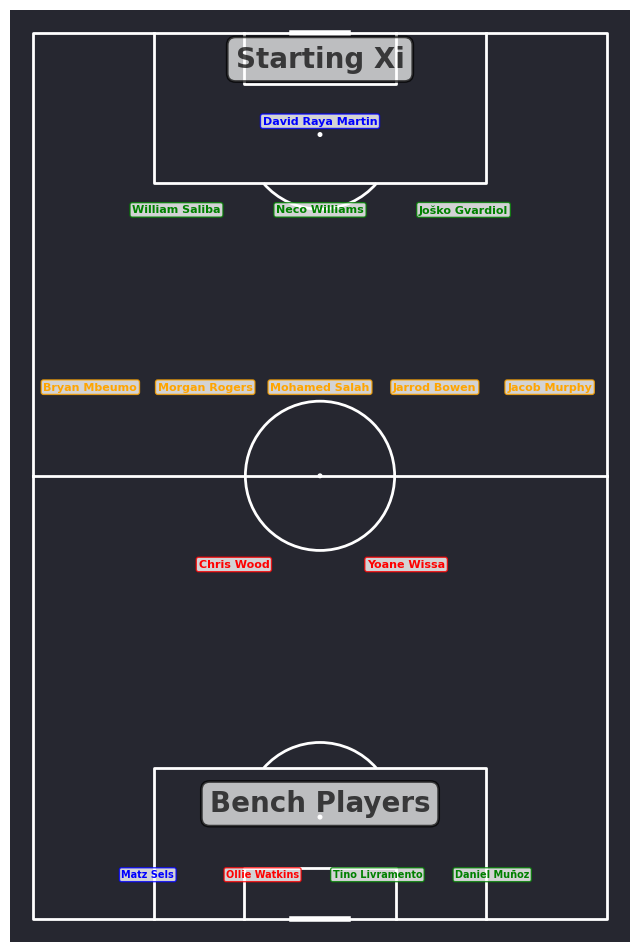

In [122]:
def plot_mplsoccer_pitch_starting11_and_bench(starting_xi_df, bench_df):
    """
    Plots the starting 11 and bench on a vertical soccer pitch.
    Bench players are shown at y=90, with GK first, then others.
    """
    from mplsoccer import VerticalPitch
    import matplotlib.pyplot as plt

    # Map FPL positions to mplsoccer codes
    pos_map = {
        'Goalkeeper': 'GKP',
        'Defender': 'DEF',
        'Midfielder': 'MID',
        'Forward': 'FWD'
    }

    # Prepare list of dicts for plotting
    players = []
    for _, row in starting_xi_df.iterrows():
        players.append({
            'name': row['full_name'],
            'position': pos_map[row['position']]
        })

    # Prepare bench players (GK first, then others)
    bench_players = []
    bench_gk = bench_df[bench_df['position'] == 'Goalkeeper']
    bench_outfield = bench_df[bench_df['position'] != 'Goalkeeper']
    for _, row in pd.concat([bench_gk, bench_outfield]).iterrows():
        bench_players.append({
            'name': row['full_name'],
            'position': pos_map[row['position']]
        })

    # Count number of each position
    n_def = sum(1 for p in players if p['position'] == 'DEF')
    n_mid = sum(1 for p in players if p['position'] == 'MID')
    n_fwd = sum(1 for p in players if p['position'] == 'FWD')

    # Y positions by line
    y_positions = {
        'GKP': 10,
        'DEF': 20,
        'MID': 40,
        'FWD': 60
    }

    # X positions by line for spacing players evenly
    x_positions = {
        'GKP': [50],  # always 1 goalkeeper
        'DEF': [90, 70, 50, 30, 10],  # default for 5 defenders
        'MID': [90, 70, 50, 30, 10],  # default for 5 mids
        'FWD': [75, 50, 25]          # default for 3 forwards
    }
    # Adjust DEF line
    if n_def == 4:
        x_positions['DEF'] = [80, 60, 40, 20]
    elif n_def == 3:
        x_positions['DEF'] = [75, 50, 25]
    # Adjust MID line
    if n_mid == 4:
        x_positions['MID'] = [80, 60, 40, 20]
    elif n_mid == 3:
        x_positions['MID'] = [75, 50, 15]
    # Adjust FWD line
    if n_fwd == 2:
        x_positions['FWD'] = [35, 65]
    elif n_fwd == 1:
        x_positions['FWD'] = [50]

    # Colors for each position
    colors = {
        'GKP': 'blue',
        'DEF': 'green',
        'MID': 'orange',
        'FWD': 'red'
    }

    # Group players by position, preserving user order
    pos_groups = {'GKP': [], 'DEF': [], 'MID': [], 'FWD': []}
    for player in players:
        pos_groups[player['position']].append(player['name'])

    fig, ax = plt.subplots(figsize=(8, 14))
    pitch = VerticalPitch(pitch_type='opta', pitch_color='#262730', line_color='white')
    pitch.draw(ax=ax)

    # Plot each player name at their position, filling left to right
    for pos in ['GKP', 'DEF', 'MID', 'FWD']:
        names = pos_groups[pos]
        xs = x_positions[pos]
        y = y_positions[pos]
        for i, name in enumerate(names):
            if i < len(xs):
                pitch.annotate(
                    name,
                    xy=(100 - y, xs[i]),  # 90-degree anticlockwise rotation
                    xytext=(0, 0),
                    textcoords='offset points',
                    ha='center',
                    va='center',
                    fontsize=8,
                    fontweight='bold',
                    color=colors[pos],
                    ax=ax,
                    bbox=dict(boxstyle='round,pad=0.2', fc='white', ec=colors[pos], lw=1, alpha=0.8)
                )

    # Plot "Bench" label
    ax.text(
        50, 13,
        "Bench Players",
        fontsize=20,
        fontweight='bold',
        color='black',
        ha='center',
        va='center',
        alpha=0.7,
        bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', lw=2, alpha=0.7)
    )

    # Plot "Starting Xi" label
    ax.text(
        50, 97,
        "Starting Xi",
        fontsize=20,
        fontweight='bold',
        color='black',
        ha='center',
        va='center',
        alpha=0.7,
        bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', lw=2, alpha=0.7)
    )

    # Plot bench players at y=90
    bench_y = 95
    bench_xs = [80, 60, 40, 20]
    for i, player in enumerate(bench_players):
        if i < len(bench_xs):
            pitch.annotate(
                player['name'],
                xy=(100 - bench_y, bench_xs[i]),
                xytext=(0, 0),
                textcoords='offset points',
                ha='center',
                va='center',
                fontsize=7,
                fontweight='bold',
                color=colors.get(player['position'], 'black'),
                ax=ax,
                bbox=dict(boxstyle='round,pad=0.2', fc='white', ec=colors.get(player['position'], 'black'), lw=1, alpha=0.8)
            )

    # plt.title("Your Current Squad", fontsize=16, fontweight='bold',color='#262730')
    plt.show()

plot_mplsoccer_pitch_starting11_and_bench(starting_xi, bench)

In [6]:
player_names = [
    "David Raya", "Livramento", "Neco Williams", "Gvardiol", "Mbeumo",
    "Morgan Rogers", "Mohamed Salah", "Bowen", "Wissa", "Chris Wood", "Watkins",
    "sels", "Jacob Murphy", "Saliba", "Daniel Muñoz"
]
starting_names = [
    "David Raya", "Saliba", "Neco Williams", "Gvardiol", "Mbeumo",
    "Morgan Rogers", "Mohamed Salah", "Bowen", "Wissa", "Chris Wood", "Jacob Murphy"
]
bench_names = ["sels", "Watkins", "Livramento", "Daniel Muñoz"]

In [10]:
from collections import Counter
import re
def find_player_ids(starting_names, bench_names, unique_players):
    found = []
    all_names = starting_names + bench_names

    # Check for duplicate names in user input
    name_counts = Counter(all_names)
    duplicates = [name for name, count in name_counts.items() if count > 1]
    if duplicates:
        print(f"Duplicate player(s) in selection: {', '.join(duplicates)}")
        return None, None

    # Match each name to a player
    for name in all_names:
        pattern = re.compile(re.escape(name), re.IGNORECASE)
        matched_rows = unique_players[unique_players['full_name'].str.contains(pattern)]
        if not matched_rows.empty:
            for _, row in matched_rows.iterrows():
                found.append((
                    row['player_id'], 
                    row['full_name'], 
                    row['team_name'], 
                    row['position']
                ))
        else:
            found.append((None, name, None, None))

    # Print any unmatched players
    for pid, pname, _, _ in found:
        if pid is None:
            print(f"Player not found: {pname}")

    # Team constraint: max 3 per team
    team_counter = Counter(team for pid, _, team, _ in found if pid is not None)
    if any(count > 3 for count in team_counter.values()):
        print("Please select at most 3 players from each team.")
        return None, None

    # Position constraint for starting XI: 1 GK, at least 3 DEF, at least 2 MID, at least 1 FWD, 11 total
    starting_positions = [pos for i, (pid, _, _, pos) in enumerate(found) if pid is not None and i < len(starting_names)]
    bench_positions = [pos for i, (pid, _, _, pos) in enumerate(found) if pid is not None and i >= len(starting_names)]

    required_start = {'Goalkeeper': 1, 'Defender': 3, 'Midfielder': 2, 'Forward': 1}
    start_counter = Counter(starting_positions)
    if start_counter['Goalkeeper'] != 1 or start_counter['Defender'] < 3 or start_counter['Midfielder'] < 2 or start_counter['Forward'] < 1 or len(starting_positions) != 11:
        print("Starting XI must have exactly 1 Goalkeeper, at least 3 Defenders, at least 2 Midfielders, at least 1 Forward, and 11 players in total.")
        print("Your starting XI selection:", dict(start_counter))
        return None, None

    if len(bench_positions) != 4:
        print("Bench must have exactly 4 players.")
        return None, None

    # Check for duplicate player IDs (in case of ambiguous name matches)
    player_ids = [pid for pid, _, _, _ in found if pid is not None]
    pid_counts = Counter(player_ids)
    pid_duplicates = [str(pid) for pid, count in pid_counts.items() if count > 1]
    if pid_duplicates:
        print(f"Duplicate player(s) detected by ID: {', '.join(pid_duplicates)}")
        return None, None

    # Prepare DataFrames for starting XI and bench
    import pandas as pd
    starting_data = [found[i] for i in range(len(starting_names))]
    bench_data = [found[i] for i in range(len(starting_names), len(found))]

    starting_xi = pd.DataFrame(starting_data, columns=['player_id', 'full_name', 'team_name', 'position'])
    bench = pd.DataFrame(bench_data, columns=['player_id', 'full_name', 'team_name', 'position'])

    return starting_xi, bench

In [9]:
def recommend_captain(fpl_data_pred, user_starting_xi_df, unique_players, current_gw):
    """
    Recommend the best captain from the starting XI based on aggregated predicted points for the next gameweek,
    handling double gameweeks by summing predicted points.

    Parameters:
    - fpl_data_pred: dataframe containing 'player_id', 'round', 'next_gw_pred'
    - user_starting_xi_df: DataFrame with at least a 'player_id' column (11 players)
    - unique_players: dataframe with columns 'player_id' and 'full_name'
    - current_gw: int, current gameweek number

    Returns:
    - captain_id: player_id of recommended captain
    - captain_name: full_name of recommended captain
    - predicted_points: aggregated predicted points for the captain
    """

    next_gw = current_gw

    # Accept DataFrame input for user_starting_xi
    player_ids = user_starting_xi_df['player_id'].tolist()

    # Filter for next gameweek and user's starting XI players
    starters_next_gw = fpl_data_pred[
        (fpl_data_pred['round'] == next_gw) &
        (fpl_data_pred['player_id'].isin(player_ids))
    ].copy()

    if starters_next_gw.empty:
        raise ValueError(f"No data available for next gameweek {next_gw} and given starting XI.")

    # Aggregate predicted points by player_id (sum to handle double gameweeks)
    agg_preds = starters_next_gw.groupby('player_id', as_index=False)['next_gw_pred'].sum()

    # Find player with max aggregated predicted points
    best_captain_row = agg_preds.loc[agg_preds['next_gw_pred'].idxmax()]
    captain_id = best_captain_row['player_id']
    predicted_points = best_captain_row['next_gw_pred']

    # Get captain name from unique_players
    captain_name = unique_players.loc[unique_players['player_id'] == captain_id, 'full_name'].values[0]

    return captain_id, captain_name, predicted_points

In [ ]:
def select_best_starting_xi_and_bench(fpl_data_pred, starting_xi_df, bench_df, current_gw, unique_players):
    import pandas as pd

    next_gw = current_gw
    all_ids = list(starting_xi_df['player_id']) + list(bench_df['player_id'])
    if len(all_ids) != 15:
        raise ValueError("You must provide exactly 15 unique player_ids (11 starting XI + 4 bench).")

    # Filter data for next GW and squad players
    squad_next_gw = fpl_data_pred[
        (fpl_data_pred['player_id'].isin(all_ids)) & (fpl_data_pred['round'] == next_gw)
    ].copy()

    # Aggregate predicted points if multiple rows per player
    agg_df = squad_next_gw.groupby(['player_id', 'position'], as_index=False).agg({'next_gw_pred': 'sum'})

    # Merge to get full_name and team_name from unique_players
    agg_df = agg_df.merge(
        unique_players[['player_id', 'full_name', 'team_name']],
        on='player_id',
        how='left'
    )

    # --- FILL IN missing players with next_gw_pred = 0 ---
    missing_ids = set(all_ids) - set(agg_df['player_id'])
    if missing_ids:
        missing_rows = unique_players[unique_players['player_id'].isin(missing_ids)].copy()
        missing_rows['next_gw_pred'] = 0
        agg_df = pd.concat([agg_df, missing_rows[['player_id', 'position', 'next_gw_pred', 'full_name', 'team_name']]], ignore_index=True)

    # Sort by predicted points descending
    agg_df = agg_df.sort_values('next_gw_pred', ascending=False).reset_index(drop=True)

    # Pick the best GK (exactly 1)
    gk_df = agg_df[agg_df['position'] == 'Goalkeeper']
    if len(gk_df) == 0:
        raise ValueError("No goalkeeper in squad for next gameweek.")
    best_gk = gk_df.iloc[0:1]

    # Pick at least 3 defenders, sorted by points
    def_df = agg_df[agg_df['position'] == 'Defender']
    if len(def_df) < 3:
        raise ValueError("Not enough defenders in squad for next gameweek.")
    best_defenders = def_df.iloc[0:3]

    # Exclude chosen GK and defenders from remaining pool
    exclude_ids = list(best_gk['player_id']) + list(best_defenders['player_id'])
    remaining_pool = agg_df[~agg_df['player_id'].isin(exclude_ids)]

    # We have selected 1 GK + 3 Defenders = 4 players so far
    slots_left = 11 - 4

    # Exclude any goalkeepers from remaining picks (to avoid second GK)
    remaining_pool = remaining_pool[remaining_pool['position'] != 'Goalkeeper']

    # Pick top remaining players (any position except GK) by predicted points
    best_remaining = remaining_pool.head(slots_left)

    # Compose optimal starting XI
    optimal_starting_11 = pd.concat([best_gk, best_defenders, best_remaining])
    optimal_starting_11 = optimal_starting_11.sort_values('next_gw_pred', ascending=False).reset_index(drop=True)

    if len(optimal_starting_11) != 11:
        raise ValueError(f"Starting XI size error: expected 11, got {len(optimal_starting_11)}")

    # Confirm position constraints again
    pos_counts = optimal_starting_11['position'].value_counts()
    if pos_counts.get('Goalkeeper', 0) != 1:
        raise ValueError(f"Starting XI must have exactly 1 goalkeeper, got {pos_counts.get('Goalkeeper', 0)}")
    if pos_counts.get('Defender', 0) < 3:
        raise ValueError(f"Starting XI must have at least 3 defenders, got {pos_counts.get('Defender', 0)}")

    # Remaining 4 players are optimal bench
    optimal_bench = agg_df[~agg_df['player_id'].isin(optimal_starting_11['player_id'])]
    optimal_bench = optimal_bench.sort_values('next_gw_pred', ascending=False).reset_index(drop=True)

    if len(optimal_bench) != 4:
        raise ValueError(f"Bench size error: expected 4, got {len(optimal_bench)}")

    # Drop next_gw_pred before returning (optional)
    cols_to_keep = ['player_id', 'position', 'full_name', 'team_name']
    optimal_starting_11 = optimal_starting_11[cols_to_keep]
    optimal_bench = optimal_bench[cols_to_keep]

    return optimal_starting_11, optimal_bench


In [160]:
def plot_mplsoccer_pitch_starting11_and_bench(starting_xi_df, bench_df, fpl_data_pred, current_gw):
    """
    Plots the starting 11 and bench on a vertical soccer pitch.
    Under each player, their predicted points for the current gameweek are shown.
    """
    from mplsoccer import VerticalPitch
    import matplotlib.pyplot as plt
    import pandas as pd

    # Merge predicted points
    gw_preds = fpl_data_pred[fpl_data_pred['round'] == current_gw][['player_id', 'next_gw_pred']]
    starting_xi_df = starting_xi_df.merge(gw_preds, on='player_id', how='left').fillna({'next_gw_pred': 0})
    bench_df = bench_df.merge(gw_preds, on='player_id', how='left').fillna({'next_gw_pred': 0})

    # Position mapping
    pos_map = {'Goalkeeper': 'GKP', 'Defender': 'DEF', 'Midfielder': 'MID', 'Forward': 'FWD'}

    # Prepare starting XI
    players = []
    for _, row in starting_xi_df.iterrows():
        players.append({
            'name': row['full_name'],
            'position': pos_map[row['position']],
            'points': row['next_gw_pred']
        })

    # Prepare bench
    bench_players = []
    bench_gk = bench_df[bench_df['position'] == 'Goalkeeper']
    bench_outfield = bench_df[bench_df['position'] != 'Goalkeeper']
    for _, row in pd.concat([bench_gk, bench_outfield]).iterrows():
        bench_players.append({
            'name': row['full_name'],
            'position': pos_map[row['position']],
            'points': row['next_gw_pred']
        })

    # Count per position
    n_def = sum(1 for p in players if p['position'] == 'DEF')
    n_mid = sum(1 for p in players if p['position'] == 'MID')
    n_fwd = sum(1 for p in players if p['position'] == 'FWD')

    # Y base positions
    y_positions = {'GKP': 10, 'DEF': 20, 'MID': 40, 'FWD': 60}
    x_positions = {
        'GKP': [50],
        'DEF': [87, 71, 50, 29, 7],
        'MID': [87, 71, 50, 29, 7],
        'FWD': [80, 50, 20]
    }
    if n_def == 4:
        x_positions['DEF'] = [85, 62, 38, 15]
    elif n_def == 3:
        x_positions['DEF'] = [80, 50, 20]
    if n_mid == 4:
        x_positions['MID'] = [85, 62, 38, 15]
    elif n_mid == 3:
        x_positions['MID'] = [80, 50, 20]
    if n_fwd == 2:
        x_positions['FWD'] = [35, 65]
    elif n_fwd == 1:
        x_positions['FWD'] = [50]

    colors = {'GKP': 'blue', 'DEF': 'green', 'MID': 'orange', 'FWD': 'red'}

    # Group by position and track points
    pos_groups = {'GKP': [], 'DEF': [], 'MID': [], 'FWD': []}
    points_map = {}
    for player in players:
        pos_groups[player['position']].append(player['name'])
        points_map[player['name']] = player['points']

    fig, ax = plt.subplots(figsize=(4, 7))
    pitch = VerticalPitch(pitch_type='opta', pitch_color='#262730', line_color='white')
    pitch.draw(ax=ax)

    # Plot Starting XI
    for pos in ['GKP', 'DEF', 'MID', 'FWD']:
        names = pos_groups[pos]
        xs = x_positions[pos]
        base_y = y_positions[pos]
        y_offsets = [0] * len(names)
        if pos in ['DEF', 'MID', 'FWD']:
            if len(names) == 5:
                y_offsets = [0, 5, 0, 5, 0]
            elif len(names) == 4:
                y_offsets = [0, 5, 0, 5]
            elif len(names) == 3:
                y_offsets = [0,5,0]

        for i, name in enumerate(names):
            if i < len(xs):
                x = xs[i]
                y = 100 - (base_y + y_offsets[i])
                pitch.annotate(
                    f"{name}\n{points_map[name]:.1f} pts",
                    xy=(y, x),
                    xytext=(0, 0),
                    textcoords='offset points',
                    ha='center',
                    va='center',
                    fontsize=5.5,
                    fontweight='bold',
                    color='white',
                    ax=ax,
                    bbox=dict(boxstyle='round,pad=0.2', fc='#0E1117', ec=colors[pos], lw=1, alpha=0.8)
                )

    # Labels
    ax.text(50, 20, "Bench Players", fontsize=12, fontweight='bold', color='black',
            ha='center', va='center', alpha=0.7,
            bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', lw=2, alpha=0.7))
    ax.text(50, 97, "Starting Xi", fontsize=12, fontweight='bold', color='black',
            ha='center', va='center', alpha=0.7,
            bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', lw=2, alpha=0.7))

    # Plot Bench
    bench_y = 95
    bench_xs = [85, 62, 38, 15]
    bench_y_offsets = [0, 4, 0, 4] if len(bench_players) == 4 else [0] * len(bench_players)
    for i, player in enumerate(bench_players):
        if i < len(bench_xs):
            y = 100 - (bench_y + bench_y_offsets[i]) + 5
            name_line = f"{player['name']}\n{player['points']:.1f} pts"
            pitch.annotate(
                name_line,
                xy=(y, bench_xs[i]),
                xytext=(0, 0),
                textcoords='offset points',
                ha='center',
                va='center',
                fontsize=5.5,
                fontweight='bold',
                color='white',
                ax=ax,
                bbox=dict(boxstyle='round,pad=0.2', fc='#0E1117', ec=colors.get(player['position'], 'black'), lw=1, alpha=0.8)
            )

In [156]:
import pandas as pd
from itertools import combinations

def optimize_squad_transfers_topk(
    fpl_data_pred,
    starting_xi_df,
    bench_df,
    current_gw,
    unique_players,
    transfers_allowed=1,
    total_value_limit=1000,
    topk_out=6,
    topk_in=20,
):
    """
    Optimize FPL squad by swapping up to transfers_allowed players,
    but only consider bottom topk_out current players for transfer out
    and top topk_in players outside squad for transfer in.

    Returns:
      new_optimised_xi: DataFrame with 11 players for starting XI
      new_optimised_bench: DataFrame with 4 players on bench
      transfers_summary: dict with 'transfers_in' and 'transfers_out' (player names)
    """

    # Combine current squad
    current_squad = pd.concat([starting_xi_df, bench_df], ignore_index=True)
    current_player_ids = set(current_squad['player_id'])

    # Filter prediction for next GW and merge player info
    pred_next_gw = fpl_data_pred[
        (fpl_data_pred['round'] == current_gw) &
        (fpl_data_pred['player_id'].isin(unique_players['player_id']))
    ][['player_id', 'next_gw_pred', 'value']].drop_duplicates(subset='player_id')

    pred_next_gw = pred_next_gw.merge(
        unique_players[['player_id', 'position', 'team_name', 'full_name']],
        on='player_id', how='left'
    )

    # Create dict for quick lookup
    player_info = pred_next_gw.set_index('player_id').to_dict('index')

    # Current players info
    current_players_df = pred_next_gw[pred_next_gw['player_id'].isin(current_player_ids)].copy()

    # Select bottom topk_out players by predicted points from current squad (worst performers)
    bottom_current = current_players_df.nsmallest(topk_out, 'next_gw_pred')['player_id'].tolist()

    # Potential players to bring in (outside current squad)
    potential_ins_all = set(unique_players['player_id']) - current_player_ids
    potential_ins_df = pred_next_gw[pred_next_gw['player_id'].isin(potential_ins_all)].copy()

    # Filter to those with predicted points > 1
    potential_ins_df = potential_ins_df[potential_ins_df['next_gw_pred'] > 1]

    # Select top topk_in players by predicted points
    top_potential_ins = potential_ins_df.nlargest(topk_in, 'next_gw_pred')['player_id'].tolist()

    # --- Helper functions (same as your original code) ---

    def valid_squad(player_ids):
        if len(player_ids) != 15:
            return False

        pos_counts = {'Goalkeeper':0, 'Defender':0, 'Midfielder':0, 'Forward':0}
        team_counts = {}

        for pid in player_ids:
            p = player_info.get(pid)
            if p is None:
                return False
            pos_counts[p['position']] += 1
            team_counts[p['team_name']] = team_counts.get(p['team_name'], 0) + 1
            if team_counts[p['team_name']] > 3:
                return False

        if pos_counts['Goalkeeper'] != 2:
            return False
        if pos_counts['Defender'] != 5:
            return False
        if pos_counts['Midfielder'] != 5:
            return False
        if pos_counts['Forward'] != 3:
            return False

        total_val = sum(player_info[pid]['value'] for pid in player_ids)
        if total_val > total_value_limit:
            return False

        return True

    def valid_starting_xi(player_ids):
        pos_counts = {'Goalkeeper':0, 'Defender':0, 'Midfielder':0, 'Forward':0}
        team_counts = {}

        for pid in player_ids:
            p = player_info.get(pid)
            if p is None:
                return False
            pos_counts[p['position']] += 1
            team_counts[p['team_name']] = team_counts.get(p['team_name'], 0) + 1
            if team_counts[p['team_name']] > 3:
                return False

        if pos_counts['Goalkeeper'] != 1:
            return False
        if pos_counts['Defender'] < 3:
            return False

        outfield = pos_counts['Defender'] + pos_counts['Midfielder'] + pos_counts['Forward']
        if outfield != 10:
            return False

        valid_formations = [
            (3, 4, 3), (3, 5, 2),
            (4, 4, 2), (4, 3, 3),
            (5, 3, 2), (5, 4, 1)
        ]
        formation = (pos_counts['Defender'], pos_counts['Midfielder'], pos_counts['Forward'])
        if formation not in valid_formations:
            return False

        return True

    def total_pred_points(player_ids):
        return sum(player_info[pid]['next_gw_pred'] for pid in player_ids)

    def pick_best_starting_xi(squad_ids):
        best_xi = None
        best_pts = -float('inf')

        players_by_pos = {'Goalkeeper':[], 'Defender':[], 'Midfielder':[], 'Forward':[]}
        for pid in squad_ids:
            pos = player_info[pid]['position']
            players_by_pos[pos].append(pid)

        gk_candidates = players_by_pos['Goalkeeper']
        if len(gk_candidates) < 2:
            return None, None

        for gk in gk_candidates:
            bench_gk = [pid for pid in gk_candidates if pid != gk][0]

            def_candidates = players_by_pos['Defender']
            mid_candidates = players_by_pos['Midfielder']
            fwd_candidates = players_by_pos['Forward']

            for D_req, M_req, F_req in [
                (3, 4, 3), (3, 5, 2),
                (4, 4, 2), (4, 3, 3),
                (5, 3, 2), (5, 4, 1)
            ]:
                if len(def_candidates) < D_req or len(mid_candidates) < M_req or len(fwd_candidates) < F_req:
                    continue

                def_combos = combinations(def_candidates, D_req)
                mid_combos = combinations(mid_candidates, M_req)
                fwd_combos = combinations(fwd_candidates, F_req)

                mid_combos = list(mid_combos)
                fwd_combos = list(fwd_combos)

                for d_combo in def_combos:
                    for m_combo in mid_combos:
                        for f_combo in fwd_combos:
                            xi_ids = [gk] + list(d_combo) + list(m_combo) + list(f_combo)

                            team_counts = {}
                            valid = True
                            for pid in xi_ids:
                                team = player_info[pid]['team_name']
                                team_counts[team] = team_counts.get(team, 0) + 1
                                if team_counts[team] > 3:
                                    valid = False
                                    break
                            if not valid:
                                continue

                            pts = total_pred_points(xi_ids)
                            if pts > best_pts:
                                best_pts = pts
                                best_xi = xi_ids

        if best_xi is None:
            return None, None

        bench_ids = set(squad_ids) - set(best_xi)
        return list(best_xi), list(bench_ids)

    # Main optimization loop
    current_squad_list = list(current_player_ids)

    best_score = -float('inf')
    best_squad = None
    best_starting_xi = None
    best_bench = None
    best_out = []
    best_in = []

    for k in range(0, transfers_allowed + 1):
        # When k=0: no transfer, just check current squad
        if k == 0:
            if valid_squad(current_player_ids):
                xi_ids, bench_ids = pick_best_starting_xi(current_player_ids)
                if xi_ids is not None:
                    total_pts = total_pred_points(xi_ids)
                    if total_pts > best_score:
                        best_score = total_pts
                        best_squad = current_player_ids
                        best_starting_xi = xi_ids
                        best_bench = bench_ids
                        best_out = []
                        best_in = []
            continue

        # For k > 0, consider combos
        outs_combos = combinations(bottom_current, k)
        ins_combos = list(combinations(top_potential_ins, k))

        for out_ids in outs_combos:
            out_set = set(out_ids)
            remaining_players = set(current_squad_list) - out_set

            for in_ids in ins_combos:
                in_set = set(in_ids)

                candidate_squad = remaining_players | in_set

                if not valid_squad(candidate_squad):
                    continue

                xi_ids, bench_ids = pick_best_starting_xi(candidate_squad)
                if xi_ids is None:
                    continue

                total_pts = total_pred_points(xi_ids) # Transfer penalty

                if total_pts > best_score:
                    best_score = total_pts
                    best_squad = candidate_squad
                    best_starting_xi = xi_ids
                    best_bench = bench_ids
                    best_out = out_ids
                    best_in = in_ids

    # Prepare output DataFrames
    if best_squad is None:
        # fallback: return original
        return starting_xi_df, bench_df, {'transfers_in': [], 'transfers_out': []}

    def build_df(player_ids):
        data = []
        for pid in player_ids:
            p = player_info[pid]
            data.append({
                'player_id': pid,
                'full_name': p['full_name'],
                'position': p['position'],
                'team_name': p['team_name'],
                'pred_points': p['next_gw_pred'],
                'value': p['value']
            })
        return pd.DataFrame(data)

    df_xi = build_df(best_starting_xi)
    df_bench = build_df(best_bench)

    transfers_summary = {
        'transfers_in': [player_info[pid]['full_name'] for pid in best_in],
        'transfers_out': [player_info[pid]['full_name'] for pid in best_out]
    }

    return df_xi.reset_index(drop=True), df_bench.reset_index(drop=True), transfers_summary


# Workflow

In [71]:
current_gw = 5

In [16]:
starting_xi, bench = find_player_ids(starting_names, bench_names, unique_players)

In [17]:
starting_xi

,player_id,full_name,team_name,position
0,15,David Raya Martin,Arsenal,Goalkeeper
1,18,William Saliba,Arsenal,Defender
2,437,Neco Williams,Nott'm Forest,Defender
3,350,Joško Gvardiol,Man City,Defender
4,99,Bryan Mbeumo,Brentford,Midfielder
5,54,Morgan Rogers,Aston Villa,Midfielder
6,328,Mohamed Salah,Liverpool,Midfielder
7,514,Jarrod Bowen,West Ham,Midfielder
8,110,Yoane Wissa,Brentford,Forward
9,447,Chris Wood,Nott'm Forest,Forward


In [19]:
bench

,player_id,full_name,team_name,position
0,443,Matz Sels,Nott'm Forest,Goalkeeper
1,58,Ollie Watkins,Aston Villa,Forward
2,409,Tino Livramento,Newcastle,Defender
3,211,Daniel Muñoz,Crystal Palace,Defender


In [28]:
optimal_starting_11, optimal_bench = select_best_starting_xi_and_bench(
    fpl_data_pred, starting_xi, bench, current_gw, unique_players
)

In [29]:
optimal_starting_11

,player_id,position,full_name,team_name
0,514,Midfielder,Jarrod Bowen,West Ham
1,99,Midfielder,Bryan Mbeumo,Brentford
2,18,Defender,William Saliba,Arsenal
3,110,Forward,Yoane Wissa,Brentford
4,447,Forward,Chris Wood,Nott'm Forest
5,211,Defender,Daniel Muñoz,Crystal Palace
6,443,Goalkeeper,Matz Sels,Nott'm Forest
7,54,Midfielder,Morgan Rogers,Aston Villa
8,402,Midfielder,Jacob Murphy,Newcastle
9,350,Defender,Joško Gvardiol,Man City


In [57]:
optimal_bench

,player_id,position,full_name,team_name
0,15,Goalkeeper,David Raya Martin,Arsenal
1,58,Forward,Ollie Watkins,Aston Villa
2,437,Defender,Neco Williams,Nott'm Forest
3,328,Midfielder,Mohamed Salah,Liverpool


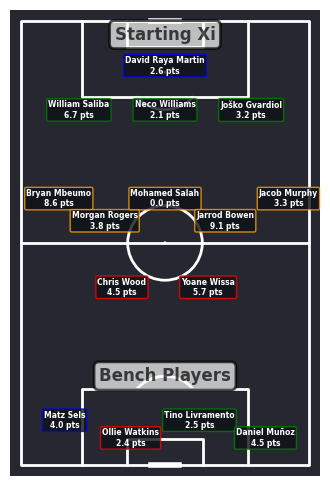

In [25]:
plot_mplsoccer_pitch_starting11_and_bench(starting_xi, bench,fpl_data_pred,current_gw)

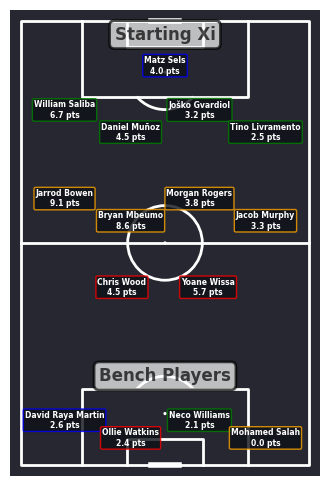

In [31]:
plot_mplsoccer_pitch_starting11_and_bench(optimal_starting_11, optimal_bench,fpl_data_pred,current_gw)

In [ ]:
fpl_data_pred

Index(['element', 'fixture', 'opponentteam_id', 'total_points', 'was_home',
       'kickoff_time', 'team_h_score', 'team_a_score', 'round', 'modified',
       'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_conceded', 'mng_win',
       'mng_draw', 'mng_loss', 'mng_underdog_win', 'mng_underdog_draw',
       'mng_clean_sheets', 'mng_goals_scored', 'value', 'transfers_balance',
       'selected', 'transfers_in', 'transfers_out', 'player_id', 'id',
       'first_name', 'second_name', 'team_name', 'position',
       'avg_points_last_3', 'avg_points_last_5', 'avg_points_last_10',
       'opponent_team_name', 'was_home_opponent', 'fdr', 'avg_minutes_last_3',
       'avg_minutes_last_5', 'avg_minu

In [201]:
current_gw = 34

new_optimised_xi,new_optimised_bench,transfer_summary = optimize_squad_transfers_topk(
    fpl_data_pred_new,
    optimal_starting_11,
    optimal_bench,
    current_gw,
    unique_players,
    transfers_allowed=5,
    total_value_limit=1000,
    topk_out=6,
    topk_in=20,
)

print("Transfers in:", transfer_summary['transfers_in'])
print("Transfers out:", transfer_summary['transfers_out'])


Transfers in: ['Matheus Santos Carneiro Da Cunha', 'Rayan Aït-Nouri', 'Kieran Trippier', 'Ryan Sessegnon', 'Bernd Leno']
Transfers out: ['David Raya Martin', 'William Saliba', 'Ollie Watkins', 'Daniel Muñoz', 'Joško Gvardiol']


In [202]:
transfer_summary

{'transfers_in': ['Matheus Santos Carneiro Da Cunha',
  'Rayan Aït-Nouri',
  'Kieran Trippier',
  'Ryan Sessegnon',
  'Bernd Leno'],
 'transfers_out': ['David Raya Martin',
  'William Saliba',
  'Ollie Watkins',
  'Daniel Muñoz',
  'Joško Gvardiol']}

In [203]:
new_optimised_xi

,player_id,full_name,position,team_name,pred_points,value
0,248,Bernd Leno,Goalkeeper,Fulham,5.644876,50
1,418,Kieran Trippier,Defender,Newcastle,9.006098,56
2,579,Ryan Sessegnon,Defender,Fulham,8.182010,41
3,533,Rayan Aït-Nouri,Defender,Wolves,9.687697,50
4,409,Tino Livramento,Defender,Newcastle,4.919894,46
5,514,Jarrod Bowen,Midfielder,West Ham,6.175139,76
6,99,Bryan Mbeumo,Midfielder,Brentford,3.342235,80
7,328,Mohamed Salah,Midfielder,Liverpool,7.423260,138
8,402,Jacob Murphy,Midfielder,Newcastle,4.669850,53
9,110,Yoane Wissa,Forward,Brentford,5.437936,66


In [197]:
def fill_missing_gameweeks(fpl_df):
    all_gameweeks = set(range(1, 39))
    info_cols = [
        'element', 'fixture', 'opponentteam_id', 'total_points', 'was_home',
        'kickoff_time', 'team_h_score', 'team_a_score', 'modified', 'minutes',
        'goals_scored', 'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
        'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards', 'saves',
        'bonus', 'bps', 'influence', 'creativity', 'threat', 'ict_index', 'starts',
        'expected_goals', 'expected_assists', 'expected_goal_involvements',
        'expected_goals_conceded', 'mng_win', 'mng_draw', 'mng_loss',
        'mng_underdog_win', 'mng_underdog_draw', 'mng_clean_sheets', 'mng_goals_scored',
        'value', 'transfers_balance', 'selected', 'transfers_in', 'transfers_out',
        'first_name', 'second_name', 'team_name', 'position', 'opponent_team_name',
        'was_home_opponent', 'fdr', 'position_encoded', 'fixture_order', 'round_adjusted',
        'master_id', 'player_id', 'id'
    ]

    new_rows = []

    for player_id, player_df in fpl_df.groupby('player_id'):
        played_rounds = set(player_df['round'].unique())
        missing_rounds = all_gameweeks - played_rounds

        if missing_rounds:
            # Get player info from first row for this player
            player_info = player_df.iloc[0][info_cols].to_dict()

            for r in missing_rounds:
                new_row = player_info.copy()
                new_row['round'] = r
                new_row['next_gw_pred'] = 0
                new_rows.append(new_row)

    if new_rows:
        df_new = pd.DataFrame(new_rows)
        fpl_df_filled = pd.concat([fpl_df, df_new], ignore_index=True)
        # Optional: sort by player and round
        fpl_df_filled = fpl_df_filled.sort_values(['player_id', 'round']).reset_index(drop=True)
        return fpl_df_filled
    else:
        return fpl_df


In [198]:
fpl_data_pred_new = fill_missing_gameweeks(fpl_data_pred)


In [199]:
fpl_data_pred_new

,element,fixture,opponentteam_id,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,modified,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,mng_win,mng_draw,mng_loss,mng_underdog_win,mng_underdog_draw,mng_clean_sheets,mng_goals_scored,value,transfers_balance,selected,transfers_in,transfers_out,player_id,id,first_name,second_name,team_name,position,avg_points_last_3,avg_points_last_5,avg_points_last_10,opponent_team_name,was_home_opponent,fdr,avg_minutes_last_3,avg_minutes_last_5,avg_minutes_last_10,xgi,xgi_avg_last_3,xgi_avg_last_5,xgi_avg_last_10,position_encoded,fixture_order,round_adjusted,master_id,next_gw_pred
0,1,2,20,0,True,2024-08-17T14:00:00Z,2,0,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.00,0,0,0,0,0,0,0,55,0,2923,0,0,1,1,Fábio,Ferreira Vieira,Arsenal,Midfielder,0.0,0.0,0.0,Aston Villa,False,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,1.0,1_2,0.365899
1,1,11,2,0,False,2024-08-24T16:30:00Z,0,2,2,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.00,0,0,0,0,0,0,0,55,-790,2321,84,874,1,1,Fábio,Ferreira Vieira,Arsenal,Midfielder,0.0,0.0,0.0,Brighton,True,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,2.0,1_11,0.107012
2,1,21,5,0,True,2024-08-31T11:30:00Z,1,1,3,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.00,0,0,0,0,0,0,0,54,-279,2397,355,634,1,1,Fábio,Ferreira Vieira,Arsenal,Midfielder,0.0,0.0,0.0,Spurs,False,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,3.0,1_21,0.207364
3,1,39,18,0,False,2024-09-15T13:00:00Z,0,1,4,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.00,0,0,0,0,0,0,0,54,-747,1650,0,747,1,1,Fábio,Ferreira Vieira,Arsenal,Midfielder,0.0,0.0,0.0,Man City,False,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,4.0,1_39,0.079921
4,1,47,13,0,False,2024-09-22T15:30:00Z,2,2,5,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.00,0,0,0,0,0,0,0,54,-174,1494,0,174,1,1,Fábio,Ferreira Vieira,Arsenal,Midfielder,0.0,0.0,0.0,Leicester,True,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,5.0,1_47,0.084449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30149,804,378,1,0,True,2025-05-25T15:00:00Z,1,2,34,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.00,0,0,0,0,0,0,0,40,0,0,0,0,804,804,Jayden,Moore,Southampton,Defender,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,38.0,804_378,0.000000
30150,804,378,1,0,True,2025-05-25T15:00:00Z,1,2,35,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.00,0,0,0,0,0,0,0,40,0,0,0,0,804,804,Jayden,Moore,Southampton,Defender,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,38.0,804_378,0.000000
30151,804,378,1,0,True,2025-05-25T15:00:00Z,1,2,36,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.00,0,0,0,0,0,0,0,40,0,0,0,0,804,804,Jayden,Moore,Southampton,Defender,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,38.0,804_378,0.000000
30152,804,378,1,0,True,2025-05-25T15:00:00Z,1,2,37,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.00,0,0,0,0,0,0,0,40,0,0,0,0,804,804,Jayden,Moore,Southampton,Defender,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,38.0,804_378,0.000000


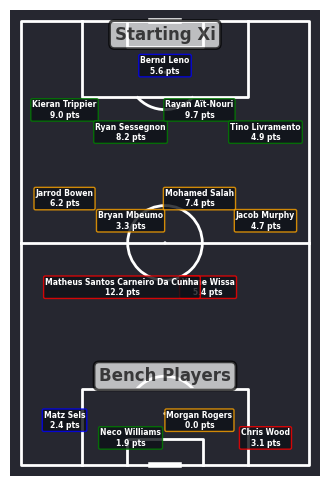

In [204]:
plot_mplsoccer_pitch_starting11_and_bench(new_optimised_xi.drop(columns=['pred_points','value']), new_optimised_bench.drop(columns=['pred_points','value']),fpl_data_pred_new,34)

In [206]:
new_optimised_xi

,player_id,full_name,position,team_name,pred_points,value
0,248,Bernd Leno,Goalkeeper,Fulham,5.644876,50
1,418,Kieran Trippier,Defender,Newcastle,9.006098,56
2,579,Ryan Sessegnon,Defender,Fulham,8.182010,41
3,533,Rayan Aït-Nouri,Defender,Wolves,9.687697,50
4,409,Tino Livramento,Defender,Newcastle,4.919894,46
5,514,Jarrod Bowen,Midfielder,West Ham,6.175139,76
6,99,Bryan Mbeumo,Midfielder,Brentford,3.342235,80
7,328,Mohamed Salah,Midfielder,Liverpool,7.423260,138
8,402,Jacob Murphy,Midfielder,Newcastle,4.669850,53
9,110,Yoane Wissa,Forward,Brentford,5.437936,66


In [164]:
rec_captain_id, rec_captain_name, rec_predicted_points = recommend_captain(fpl_data_pred, new_optimised_xi.drop(columns=['pred_points','value']),unique_players,current_gw)

In [165]:
rec_captain_name

'Mohamed Salah'

# Outputs

In [15]:
# Assuming fpl_data_pred has player_id and position columns
squad_df = fpl_data_pred[fpl_data_pred['player_id'].isin([
    15, 409, 437, 350, 99, 54, 328, 514, 110, 447, 58, 443, 402, 18, 211
])]

print(squad_df[['player_id', 'position']].drop_duplicates()['position'].value_counts())


position
Midfielder    5
Defender      5
Forward       3
Goalkeeper    2
Name: count, dtype: int64


In [151]:
current_gw = 31
recommend_captain(fpl_data_pred, starting_xi, unique_players, current_gw)

captain_id, captain_name, captain_points = recommend_captain(fpl_data_pred, starting_xi, unique_players, current_gw)
print(f"Recommended captain for GW {current_gw + 1}: {captain_name} (Player ID {captain_id}) with predicted points {captain_points:.2f}")

Recommended captain for GW 32: Jacob Murphy (Player ID 402.0) with predicted points 12.78


In [169]:
optimal_starting_11, optimal_bench = select_best_starting_xi_and_bench(
    fpl_data_pred, 
    starting_xi,      # starting_xi_df
    bench,            # bench_df
    current_gw,       # current_gw
    unique_players    # unique_players
)

print("Most optimal Starting Xi and Bench")
print(optimal_starting_11[['player_id', 'full_name', 'position', 'next_gw_pred']])
print(optimal_bench[['player_id', 'full_name', 'position', 'next_gw_pred']])


Most optimal Starting Xi and Bench
    player_id          full_name    position  next_gw_pred
0         402       Jacob Murphy  Midfielder     12.776483
1          58      Ollie Watkins     Forward     11.055138
2          54      Morgan Rogers  Midfielder     10.076761
3         328      Mohamed Salah  Midfielder      6.442336
4         110        Yoane Wissa     Forward      5.843014
5          15  David Raya Martin  Goalkeeper      5.739315
6          18     William Saliba    Defender      5.539225
7         409    Tino Livramento    Defender      5.076550
8         514       Jarrod Bowen  Midfielder      4.200296
9         350     Joško Gvardiol    Defender      3.830693
10        447         Chris Wood     Forward      3.596567
   player_id      full_name    position  next_gw_pred
0         99   Bryan Mbeumo  Midfielder      3.232510
1        443      Matz Sels  Goalkeeper      2.663007
2        437  Neco Williams    Defender      2.472127
3        211   Daniel Muñoz    Defender  

In [197]:
transfers_allowed = 1
current_gw = 28

result = suggest_transfers_topk(
    fpl_data_pred=fpl_data_pred,
    starting_xi_df=optimal_starting_11,
    bench_df = optimal_bench,
    current_gw=current_gw,
    unique_players=unique_players,
    transfers_allowed=transfers_allowed,
    total_value_limit=1000
)

if 'error' in result:
    print("Error:", result['error'])
else:
    print(f"Points gain from transfers: {result['points_gain']:.2f}")
    if result['points_gain'] == 0:
        print("No transfer improves the predicted points, keep your current squad.")
    else:
        print("Suggested transfers:")
        for out_pid, in_pid in zip(result['transfers_out'], result['transfers_in']):
            out_name = unique_players.loc[unique_players['player_id'] == out_pid, 'full_name'].values[0]
            in_name = unique_players.loc[unique_players['player_id'] == in_pid, 'full_name'].values[0]
            print(f"Transfer out: {out_name} (ID: {out_pid})")
            print(f"Transfer in: {in_name} (ID: {in_pid})")
        print("\nNew Starting XI:")
        print(result['new_starting_df'][['full_name', 'position', 'next_gw_pred']])
        print("\nNew Bench:")
        print(result['new_bench_df'][['full_name', 'position', 'next_gw_pred']])
        print(f"Total team value £{result['total_value']/10}M")


Points gain from transfers: 9.50
Suggested transfers:
Transfer out: Jarrod Bowen (ID: 514)
Transfer in: Bruno Borges Fernandes (ID: 366)

New Starting XI:
                 full_name    position  next_gw_pred
0   Bruno Borges Fernandes  Midfielder     14.700043
1              Yoane Wissa     Forward      6.339450
2           William Saliba    Defender      6.113910
3             Bryan Mbeumo  Midfielder      5.254827
4        David Raya Martin  Goalkeeper      3.419945
5               Chris Wood     Forward      3.026508
6            Neco Williams    Defender      2.690696
7           Joško Gvardiol    Defender      2.580494
8            Mohamed Salah  Midfielder      0.000000
9             Jacob Murphy  Midfielder      0.000000
10           Ollie Watkins     Forward      0.000000

New Bench:
         full_name    position  next_gw_pred
0        Matz Sels  Goalkeeper       3.08826
1    Morgan Rogers  Midfielder       0.00000
2     Daniel Muñoz    Defender       0.00000
3  Tino Livrament

In [180]:
starting_xi,bench =find_player_ids(starting_names,bench_names,unique_players)
if starting_xi is not None and bench is not None:
    player_ids = list(starting_xi['player_id']) + list(bench['player_id'])
else:
    player_ids = []


In [181]:
player_ids

[15, 18, 437, 350, 99, 54, 328, 514, 110, 447, 402, 443, 58, 409, 211]

In [199]:
fpl_data_pred

,element,fixture,opponentteam_id,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,modified,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,mng_win,mng_draw,mng_loss,mng_underdog_win,mng_underdog_draw,mng_clean_sheets,mng_goals_scored,value,transfers_balance,selected,transfers_in,transfers_out,player_id,id,first_name,second_name,team_name,position,avg_points_last_3,avg_points_last_5,avg_points_last_10,opponent_team_name,was_home_opponent,fdr,avg_minutes_last_3,avg_minutes_last_5,avg_minutes_last_10,xgi,xgi_avg_last_3,xgi_avg_last_5,xgi_avg_last_10,position_encoded,fixture_order,round_adjusted,master_id,next_gw_pred,full_name
0,182,54,5,25,True,2024-09-28T14:00:00Z,4,2,6,False,90,4,0,0,2,0,0,0,0,0,0,3,97,149.0,54.7,82.0,28.6,1,2.41,0.62,3.03,1.11,0,0,0,0,0,0,0,106,-43652,4079413,223471,267123,182,182,Cole,Palmer,Chelsea,Midfielder,5.666667,7.2,7.2,Nott'm Forest,True,4.0,81.000000,83.0,83.0,3.03,0.420000,0.4680,0.4680,4,1,6.0,182_54,19.183174,Cole Palmer
4,328,169,18,21,False,2024-12-22T16:30:00Z,3,6,17,False,86,2,2,0,3,0,0,0,0,0,0,3,69,102.0,32.6,117.0,25.2,1,1.91,0.15,2.06,1.12,0,0,0,0,0,0,0,134,93187,7010771,127408,34221,328,328,Mohamed,Salah,Liverpool,Midfielder,12.000000,12.6,10.7,Leicester,True,1.0,87.666667,88.6,87.5,2.06,1.096667,1.2740,1.0000,4,1,17.0,328_169,17.875381,Mohamed Salah
6,328,139,15,18,False,2024-12-04T19:30:00Z,3,3,14,False,90,2,1,0,3,0,0,0,0,0,0,3,59,89.8,43.3,71.0,20.4,1,0.68,0.24,0.92,2.09,0,0,0,0,0,0,0,132,317106,6485306,329258,12152,328,328,Mohamed,Salah,Liverpool,Midfielder,13.333333,11.8,9.2,NaN,NaN,0.0,87.666667,88.6,87.5,0.92,1.620000,1.1940,0.9530,4,1,14.0,328_139,17.585320,Mohamed Salah
7,351,17,10,17,True,2024-08-24T14:00:00Z,4,1,2,False,89,3,0,0,1,0,0,0,0,0,0,3,80,97.2,3.3,83.0,18.4,1,1.79,0.04,1.83,0.29,0,0,0,0,0,0,0,150,222715,5207729,275319,52604,351,351,Erling,Haaland,Man City,Forward,7.000000,7.0,7.0,West Ham,False,2.0,90.000000,90.0,90.0,1.83,0.280000,0.2800,0.2800,1,1,2.0,351_17,16.735840,Erling Haaland
8,71,218,15,22,False,2025-01-18T12:30:00Z,1,4,22,False,90,3,1,0,1,0,0,0,1,0,0,3,79,122.0,38.5,45.0,20.6,1,0.22,0.11,0.33,0.79,0,0,0,0,0,0,0,55,-9728,349371,22257,31985,71,71,Justin,Kluivert,Bournemouth,Midfielder,3.666667,4.2,5.1,Nott'm Forest,True,4.0,45.666667,57.0,63.9,0.33,0.533333,0.5220,0.5990,4,1,22.0,71_218,16.719402,Justin Kluivert
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27598,78,130,20,0,False,2024-11-30T15:00:00Z,2,4,13,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,57,-320042,740410,4273,324315,78,78,Antoine,Semenyo,Bournemouth,Midfielder,4.333333,3.2,3.4,Spurs,True,2.0,90.000000,90.0,87.7,0.00,0.523333,0.4680,0.3960,4,1,13.0,78_130,-0.804219,Antoine Semenyo
27599,399,307,11,0,False,2025-04-07T19:00:00Z,0,3,31,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,48,-128562,752225,159,128721,399,399,Lewis,Hall,Newcastle,Defender,0.333333,2.0,2.5,Crystal Palace,True,3.0,0.000000,36.0,60.1,0.00,0.000000,0.0480,0.0720,0,2,31.1,399_307,-0.843716,Lewis Hall
27600,230,109,19,0,False,2024-11-09T15:00:00Z,0,0,11,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,58,-205396,1061489,50224,255620,230,230,Dwight,McNeil,Everton,Midfielder,3.333333,5.4,5.1,Brentford,True,3.0,88.333333,87.4,88.7,0.00,0.170000,0.2200,0.4100,4,1,11.0,230_109,-0.983626,Dwight McNeil
27601,11,303,5,-2,True,2025-04-05T14:00:00Z,2,1,31,False,9,0,0,0,0,0,0,0,0,1,0,0,-9,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.02,0,0,0,0,0,0,0,59,-8579,93856,4458,13037,11,

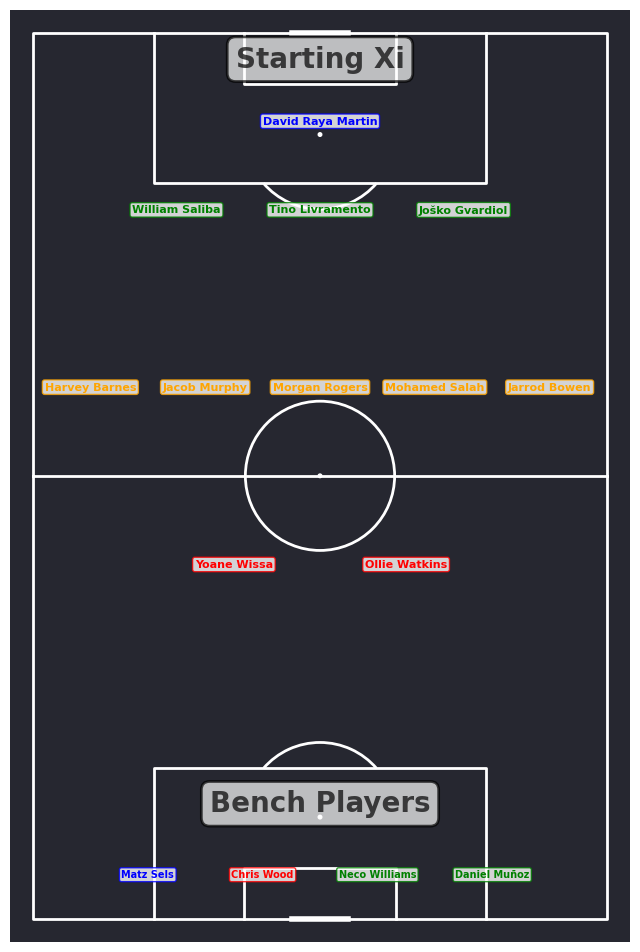

In [176]:
plot_mplsoccer_pitch_starting11_and_bench(result['new_starting_df'], result['new_bench_df'])

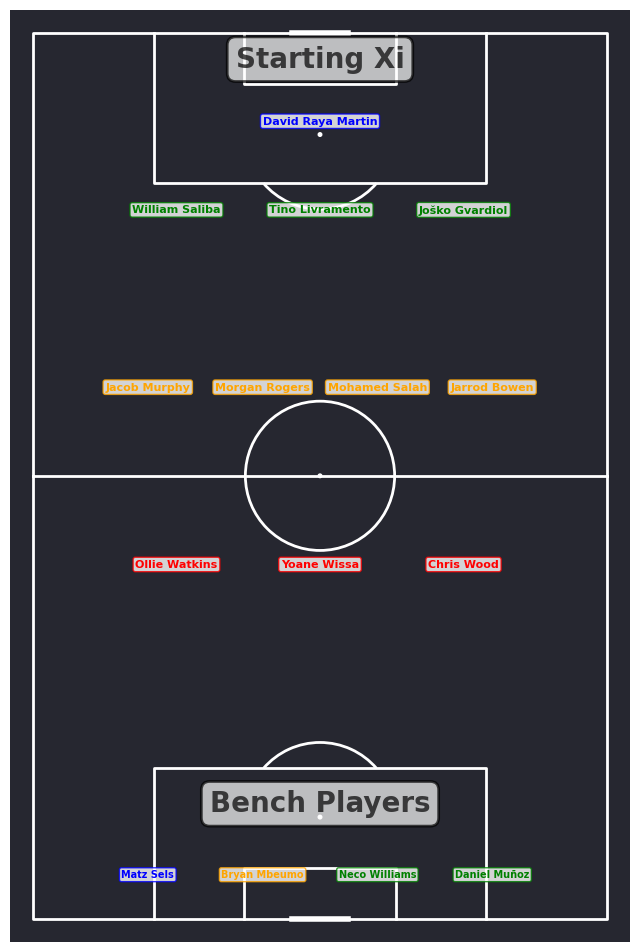

In [170]:
plot_mplsoccer_pitch_starting11_and_bench(optimal_starting_11, optimal_bench)

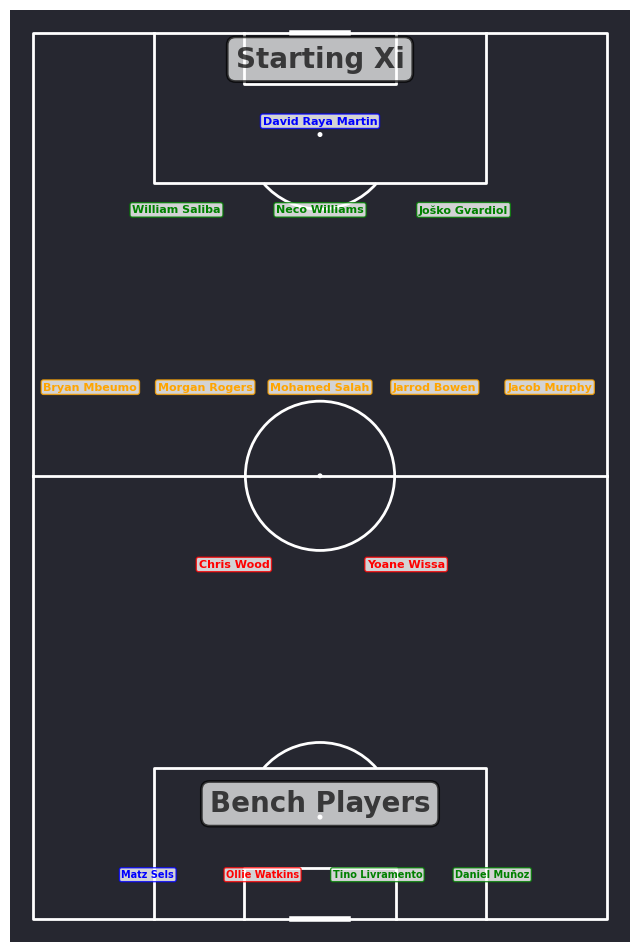

In [125]:
plot_mplsoccer_pitch_starting11_and_bench(starting_xi, bench)